In [5]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# 38,888 A EDA Project on Lebron James' 20 Year NBA Career

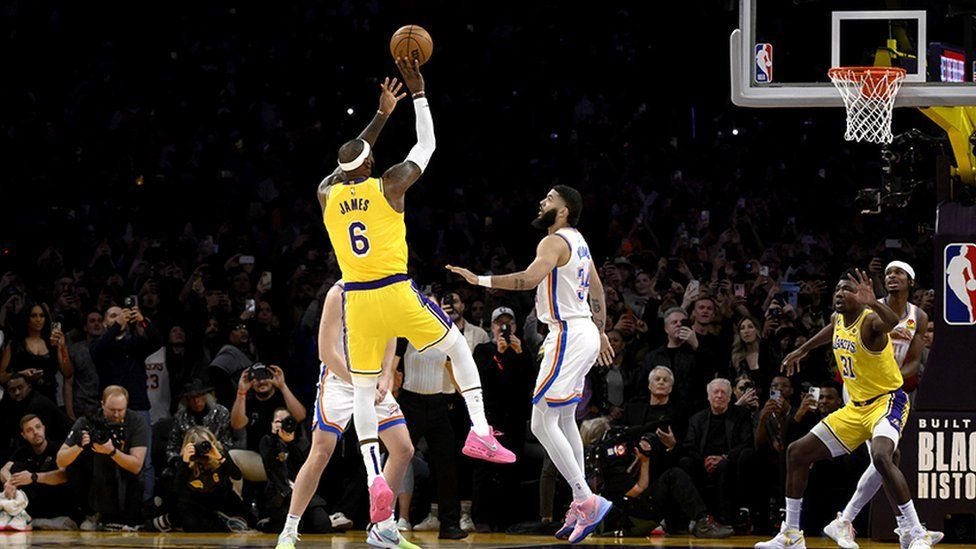

**Background:** With his 36th point of the night on the 7th of February 2023 LeBron hit the fadeaway that would see him breaking a 38 year record to become the all-time leading scorer in 70 years of the NBA. Adding to the long list of achievements that have defined the career of one of the greatest athletes of this generation, there is a lot to be understood about what brought LeBron here. With his physical dominance, longevity and commitment to the game making him a force to be reckoned with ever since his first shot as a Cleveland Cavalier in 2003, we look into what 1410 games over 20 seasons in the NBA looks like for the league's new all-time scoring champion.

## Project Statement
This project has three main aims:

1. Firstly, we seek to understand what about LeBron's game has made him so dominant in the league by examining how his game statistics compare to other players over the same time frame.

2. Secondly, we will examine how LeBron's game has changed over twenty seasons in the NBA and how he has changed his game to match the changes in both the league and changes to his physical abilities.

3. Lastly, we compare LeBron's game to that of other all-time greats like Kareem, MJ and others to add some insights into the GOAT debate.

## Hypothesis
Matching each of these three aims, we believe that the numbers will illuminate the following:

1. LeBron's greatest edge over other competitors in the same time period include: his longevity and lack of injuries, his efficiency, transition plays and his usage by teams

2. LeBron's early career was defined by physical dominance and a high court IQ. With his physical dominance peaking towards the end of his first decade in the NBA, LeBron developed his skills as a three-point shooter and got to the line more while maintaining his excellence as a transition scorer.

3. While numbers don't tell the whole story, we believe that LeBron's oncourt impact will rival that of some of the greatest players of all time.

## Dataset
We use data from the official *NBA Advanced Stats* site that we access with the public [nba_api client](https://github.com/swar/nba_api) developed by user [Swar Patel](https://github.com/swar) amongst others. 

In [6]:
# testing
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players

# find and store player info
player_info = players.find_players_by_full_name('lebron james')[0]
print(player_info)

{'id': 2544, 'full_name': 'LeBron James', 'first_name': 'LeBron', 'last_name': 'James', 'is_active': True}


In [ ]:
# get career stats
career = playercareerstats.PlayerCareerStats(player_id=player_info["id"], per_mode36="PerGame")
career_df = career.get_data_frames()[0]
print(career_df.shape)
print(career_df.columns)

In [22]:
career_df = career_df[['TEAM_ABBREVIATION','PLAYER_AGE', 'GP', 'GS', 'MIN', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
display(career_df)

,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FG_PCT,FG3A,FG3_PCT,FT_PCT,REB,AST,STL,BLK,TOV,PF,PTS
0,CLE,19.0,79,79,39.5,0.417,2.7,0.290,0.754,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,CLE,20.0,80,80,42.3,0.472,3.9,0.351,0.750,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,CLE,21.0,79,79,42.5,0.480,4.8,0.335,0.738,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,CLE,22.0,78,78,40.9,0.476,4.0,0.319,0.698,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,CLE,23.0,75,74,40.4,0.484,4.8,0.315,0.712,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,CLE,24.0,81,81,37.7,0.489,4.7,0.344,0.780,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,CLE,25.0,76,76,39.0,0.503,5.1,0.333,0.767,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,MIA,26.0,79,79,38.8,0.510,3.5,0.330,0.759,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,MIA,27.0,62,62,37.5,0.531,2.4,0.362,0.771,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,MIA,28.0,76,76,37.9,0.565,3.3,0.406,0.753,8.0,7.3,1.7,0.9,3.0,1.4,26.8


Text(0, 0.5, 'PPG')

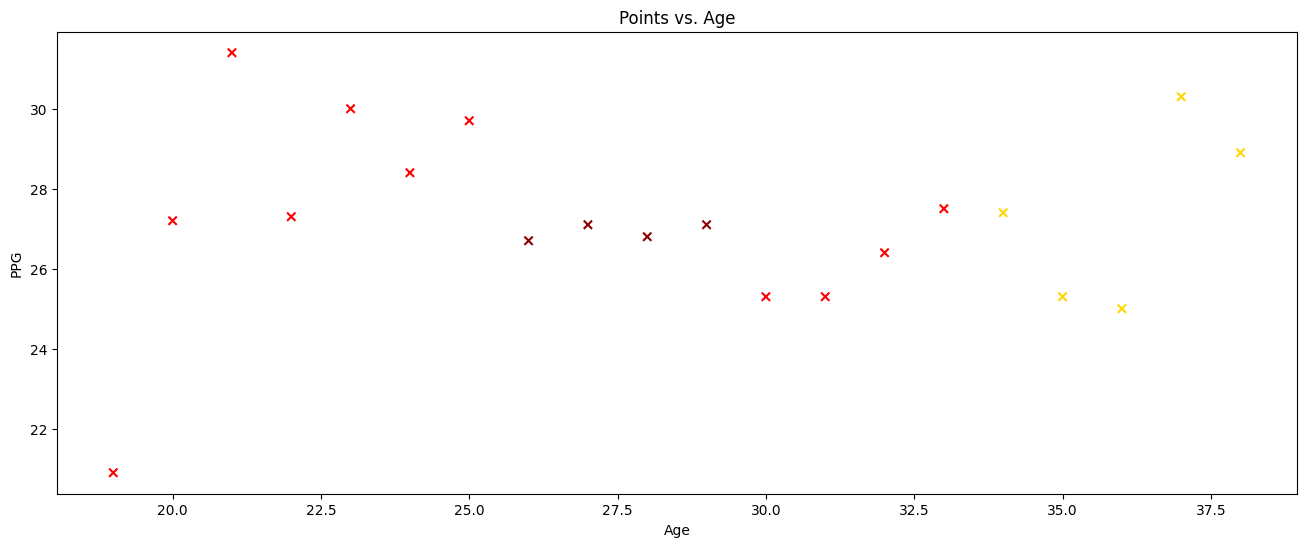

In [20]:
fig = plt.figure(figsize=(16, 6))
colors = career_df['TEAM_ABBREVIATION'].map({'CLE': 'red', 'MIA': 'darkred', 'LAL': 'gold'})
plt.scatter(career_df['PLAYER_AGE'], career_df['PTS'], marker = 'x', c = colors)
plt.title('Points vs. Age')
plt.xlabel('Age')
plt.ylabel('PPG')